<a href="https://colab.research.google.com/github/SanskarGithub07/Statistics_Project/blob/main/apple_stock_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd

In [4]:
FILE_PATH = "appleCsv.csv"
df = pd.read_csv(FILE_PATH)
print(df.head())

             timestamp    open    high      low   close  volume
0  2024-05-24 19:59:00  190.09  190.09  189.950  189.95     487
1  2024-05-24 19:58:00  190.03  190.09  189.930  190.09     487
2  2024-05-24 19:57:00  190.01  190.03  189.930  190.03     782
3  2024-05-24 19:56:00  190.01  190.02  190.000  190.01     511
4  2024-05-24 19:55:00  189.97  190.00  189.935  190.00     454


In [5]:
len(df)

20090

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20090 entries, 0 to 20089
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  20090 non-null  object 
 1   open       20090 non-null  float64
 2   high       20090 non-null  float64
 3   low        20090 non-null  float64
 4   close      20090 non-null  float64
 5   volume     20090 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 941.8+ KB


In [7]:
df.describe()

,open,high,low,close,volume
count,20090.000000,20090.000000,20090.000000,20090.000000,2.009000e+04
mean,183.405636,183.476618,183.295893,183.404263,7.100262e+04
std,7.246244,7.241909,7.289223,7.241772,5.290749e+05
min,162.700000,169.062000,158.007000,165.840000,1.000000e+00
25%,181.545000,181.595000,181.404750,181.544000,3.100000e+02
50%,184.632500,184.715000,184.549500,184.630000,3.415000e+03
75%,189.857250,189.890000,189.810000,189.855000,7.139150e+04
max,202.414000,203.401000,192.721000,203.401000,3.449607e+07


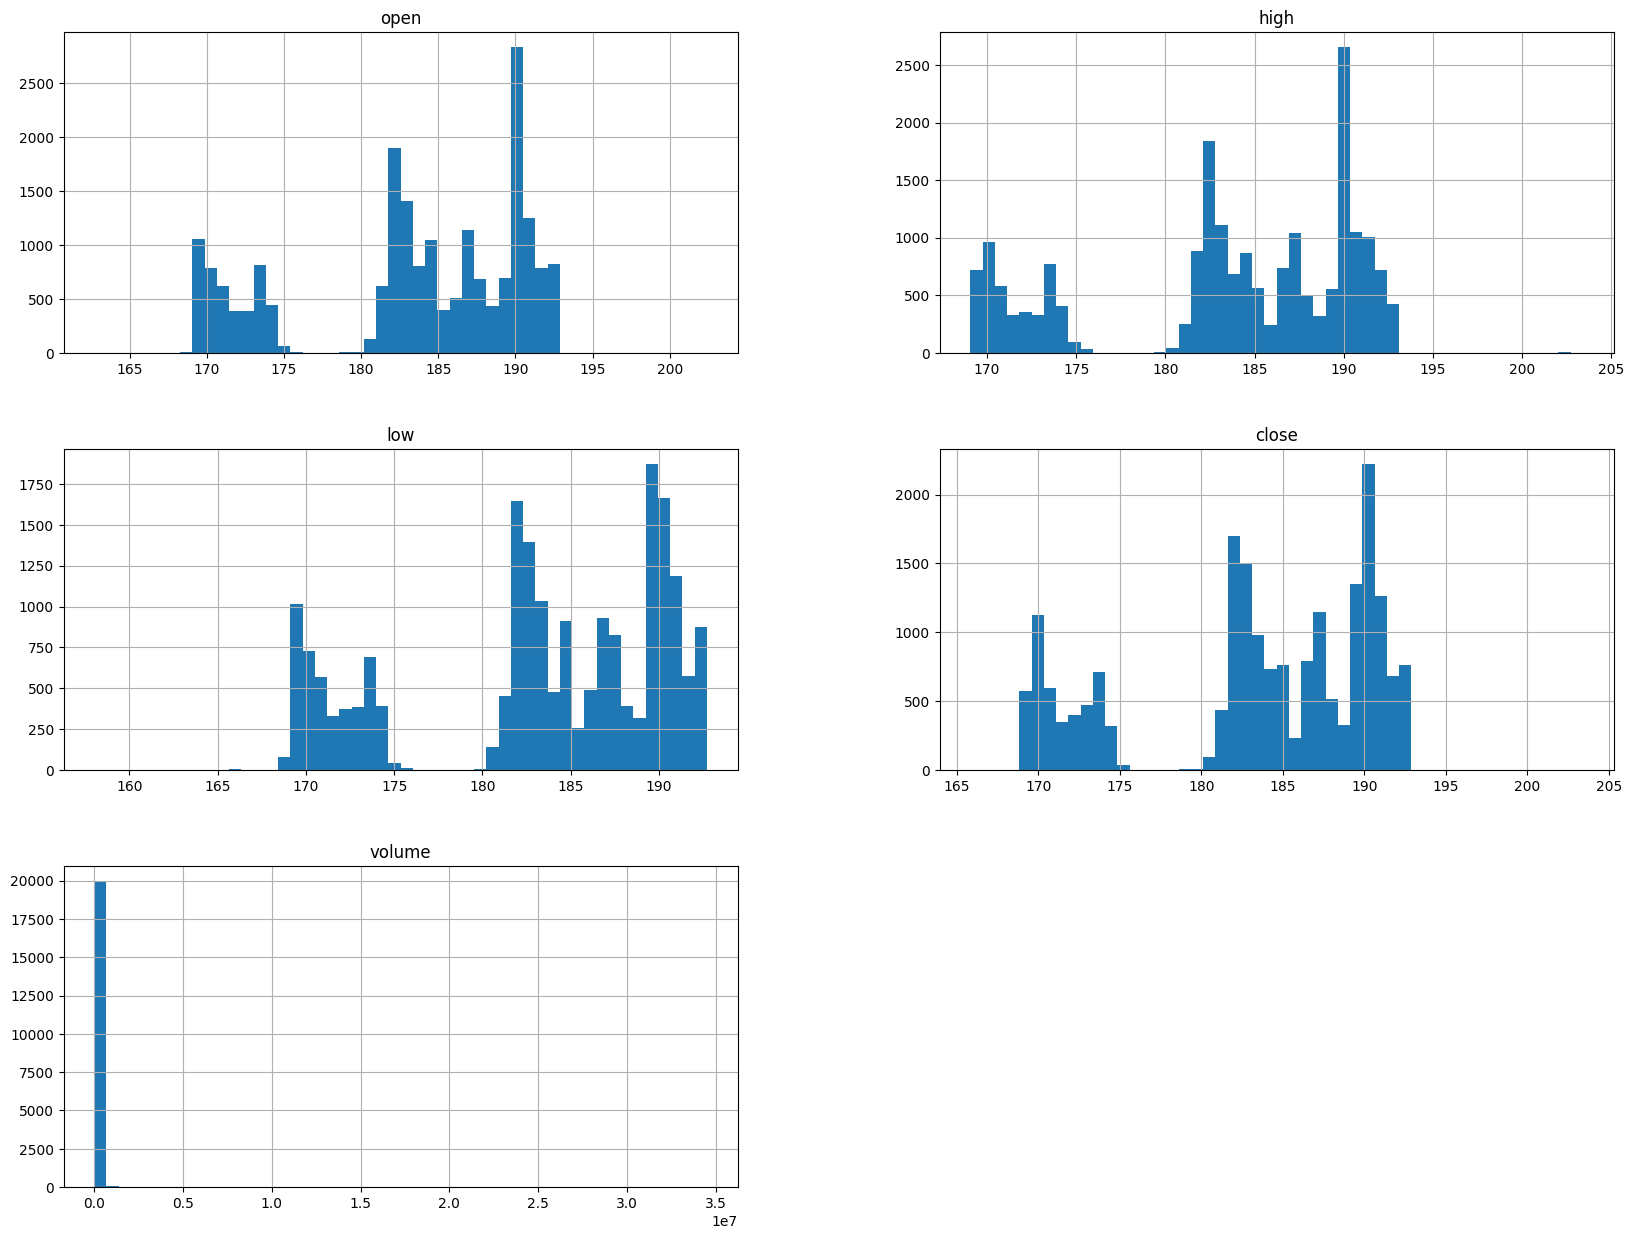

In [8]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

Before Scaling:
Mean Squared Error: 9.078211325640579
R-squared: 0.8267859175281298


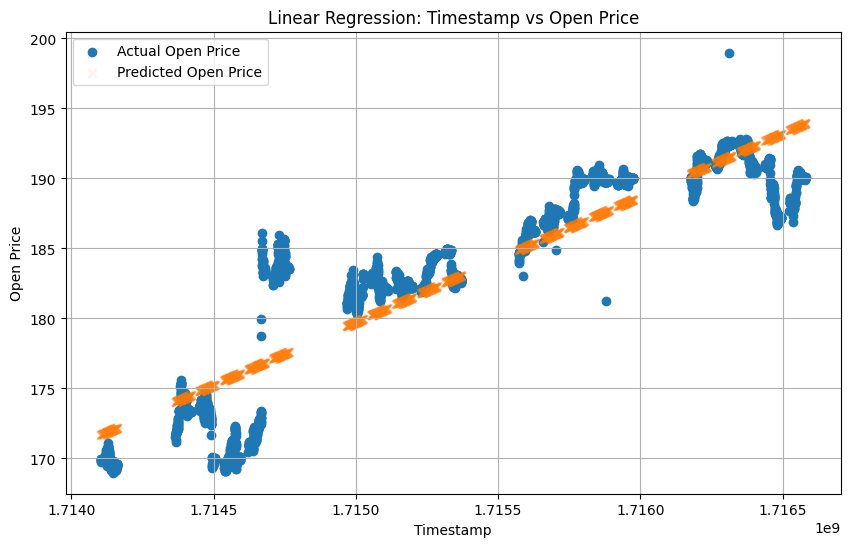

Coefficients of the Model before scaling: 
Intercept: -15243.993631304294
Coefficient: 8.993428047827237e-06


After Scaling:
Mean Squared Error: 0.17281507205753013
R-squared: 0.826785917528132


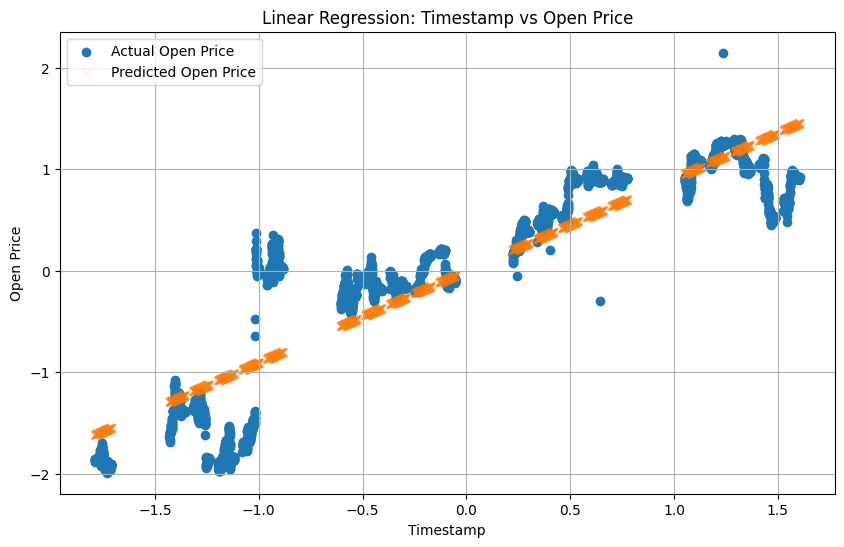

Coefficients of the Model after scaling: 
Intercept: 4.684293460109509e-14
Coefficient: 0.9057974539466241


Error after finding best fit for data: 
Mean Squared Error: 0.044436251244400246
R-squared: 0.9991521474647711


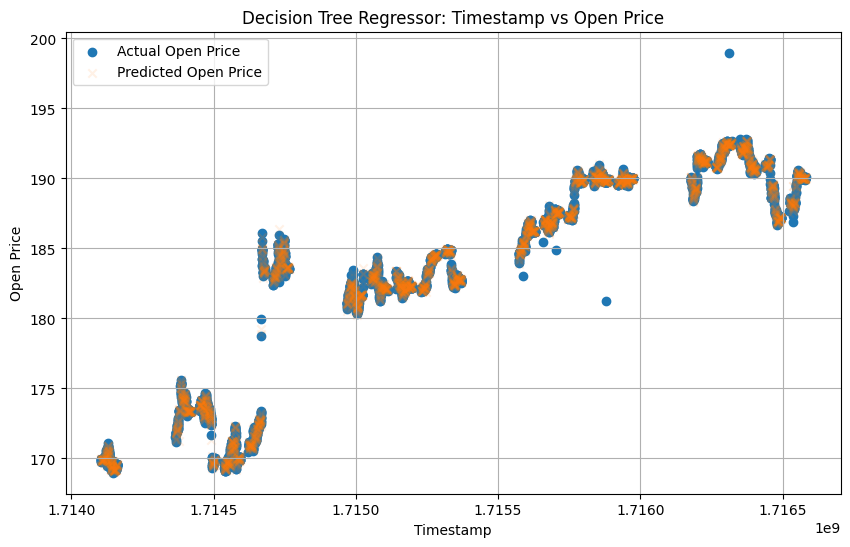

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

# Converting timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
# Converting timestamp to Unix epoch time for numerical analysis
df['timestamp_numeric'] = df['timestamp'].apply(lambda x: x.timestamp())

# Train Test Splits of the data
X = df['timestamp_numeric'].values.reshape(-1, 1)
y = df['open']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42);

# Training the linear regression model before scaling the features and labels
model_before = LinearRegression()
model_before.fit(X_train, y_train)
y_preds = model_before.predict(X_test)

# Calculating the error of the test data prediction before scaling
mse_before = mean_squared_error(y_test, y_preds)
r2_before = r2_score(y_test, y_preds)
print("Before Scaling:")
print("Mean Squared Error:", mse_before)
print("R-squared:", r2_before)

# Visualizing the results of the model before scaling
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual Open Price', alpha=1)
plt.scatter(X_test, y_preds, label='Predicted Open Price', alpha=0.1, marker='x')
plt.xlabel('Timestamp')
plt.ylabel('Open Price')
plt.title('Linear Regression: Timestamp vs Open Price')
plt.legend()
plt.grid(True)
plt.show()

# Coefficients of the model
print("Coefficients of the Model before scaling: ")
print("Intercept:", model_before.intercept_)
print("Coefficient:", model_before.coef_[0])
print("\n")

# Scaling of the train and test data
mean_X_train = X_train.mean()
std_X_train = X_train.std()
X_train_scaled = (X_train - mean_X_train) / std_X_train
X_test_scaled = (X_test - mean_X_train) / std_X_train

mean_y_train = y_train.mean()
std_y_train = y_train.std()
y_train_scaled = (y_train - mean_y_train) / std_y_train
y_test_scaled = (y_test - mean_y_train) / std_y_train

# Training the model after scaling
model_after = LinearRegression()
model_after.fit(X_train_scaled, y_train_scaled)
y_preds_scaled = model_after.predict(X_test_scaled)

# Calculating the error of the test data prediction after scaling
mse_after = mean_squared_error(y_test_scaled, y_preds_scaled)
r2_after = r2_score(y_test_scaled, y_preds_scaled)
print("After Scaling:")
print("Mean Squared Error:", mse_after)
print("R-squared:", r2_after)

# Visualizing the results of the model after scaling
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled, y_test_scaled, label='Actual Open Price', alpha=1)
plt.scatter(X_test_scaled, y_preds_scaled, label='Predicted Open Price', alpha=0.1, marker='x')
plt.xlabel('Timestamp')
plt.ylabel('Open Price')
plt.title('Linear Regression: Timestamp vs Open Price')
plt.legend()
plt.grid(True)
plt.show()

# Printing the coefficients of the linear regression model after scaling
print("Coefficients of the Model after scaling: ")
print("Intercept:", model_after.intercept_)
print("Coefficient:", model_after.coef_[0])
print("\n")

# Best representation of the data using decision tree regressor
model_best = DecisionTreeRegressor()
model_best.fit(X_train, y_train)
y_preds_best = model_best.predict(X_test)

# Calculating the error of the test data prediction for the model which best fits the data
mse_best = mean_squared_error(y_test, y_preds_best)
r2_best = r2_score(y_test, y_preds_best)
print("Error after finding best fit for data: ")
print("Mean Squared Error:", mse_best)
print("R-squared:", r2_best)

# Visualizing the results of the decision tree regressor model
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual Open Price', alpha=1)
plt.scatter(X_test, y_preds_best, label='Predicted Open Price', alpha=0.1, marker='x')
plt.xlabel('Timestamp')
plt.ylabel('Open Price')
plt.title('Decision Tree Regressor: Timestamp vs Open Price')
plt.legend()
plt.grid(True)
plt.show()